In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')

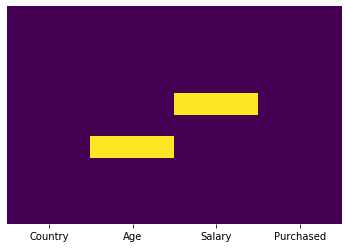

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
X = df.drop('Purchased', axis=1)
X.head()

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN


In [5]:
import pandas as pd
df = pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [6]:
y = df['Purchased']
y.head

<bound method NDFrame.head of 0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object>

In [7]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
simpleImputer = SimpleImputer()
simpleImputer = simpleImputer.fit(X[['Age','Salary']])
X[['Age','Salary']] = simpleImputer.transform(X[['Age','Salary']])
X.head()

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778


In [8]:
country = pd.get_dummies(X['Country'],drop_first=True)
country.head()

,Germany,Spain
0,0,0
1,0,1
2,1,0
3,0,1
4,1,0


In [9]:
X = pd.concat([X,country],axis=1)
X.head()

,Country,Age,Salary,Germany,Spain
0,France,44.0,72000.000000,0,0
1,Spain,27.0,48000.000000,0,1
2,Germany,30.0,54000.000000,1,0
3,Spain,38.0,61000.000000,0,1
4,Germany,40.0,63777.777778,1,0


In [10]:
X.drop('Country', inplace=True, axis=1)
X.head()

,Age,Salary,Germany,Spain
0,44.0,72000.000000,0,0
1,27.0,48000.000000,0,1
2,30.0,54000.000000,1,0
3,38.0,61000.000000,0,1
4,40.0,63777.777778,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)